# LIBRARIES

In [1]:
### IMPORT LIBRARIES ###
# MATH
import math
# NUMPY
import numpy as np # linear algebra
# PANDAS
import pandas as pd # data processing
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
# MATPLOTLIB
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
# SEABORN
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
# SCIPY
from scipy import stats
from scipy.stats import norm, skew #for some statistics
# WARNING
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
# MODELS
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
# MODEL HELPERS
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# DISPLAY
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display_html
# POWER PREDICTIVE SCORE
!pip install ppscore
import ppscore as pps
# TABULETE
!pip install tabulate
from tabulate import tabulate

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# NOTEBOOK SETTINGS

In [2]:
# Notebook settings
pd.set_option('display.max_columns', None)
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'red', 'figure.facecolor':'white'})

# DATASET IMPORT AND OVERVIEW

In [0]:
### IMPORT AND PREPARE DATASETS ###
dataset_train = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')

In [0]:
# Create a copy of train and test datasets
ds_train = dataset_train.copy()
ds_test = dataset_test.copy()
ds = [ds_train, ds_test]

In [5]:
# first look on train dataset
ds_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.000,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.000,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.000,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.000,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.000,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.000,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.000,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.000,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.000,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.

In [6]:
# first look on test dataset
ds_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000,Fin,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,1017.000,1280.000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.000,RFn,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.000,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000,TA,TA,CBlock,TA,TA,No,Unf,0.000,Unf,0.000,546.000,546.000,GasA,Gd,Y,SBrkr,546,546,0,1092,0.000,0.000,1,1,3,1,TA,5,Typ,0,NaN,NaN,nan,NaN,0.000,0.000,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.000,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,252.000,Unf,0.000,294.000,546.000,GasA,TA,Y,SBrkr,546,546,0,1092,0.000,0.000,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.000,Unf,1.000,286.000,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.000,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,ALQ,1224.000,Unf,0.000,0.000,1224.000,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.000,0.000,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.000,Unf,2.000,576.

In [7]:
# train variables info
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# test variables info
ds_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [0]:
# Create target and idependent variables list
target = 'SalePrice'
train_columns = list(ds_train.columns.values)
train_columns.remove('SalePrice')

# CLASSES USED IN NOTEBOOK
### - Processing class
### - Data analysis class


In [0]:
### PROCESSING CLASS ####
class DataProcessing(): 
  def __init__(self, X_train, X_test):
    self.X_train = X_train # Train set
    self.X_test = X_test # Test set
    self.drop_list = [] # List of irrelevant columns
    self.cleaning_list = [] # List of columns with nan values
    self.datasets = [self.X_train, self.X_test] # list of datasets

  def drop_vars_list(self, freq = 0.9, null_factor = 0.6):
    # Checking if there is a value representing over (freq) of the column 
    # freq - frequency of value from 0 to 1, 0.5 means that half of samples have one value
    # null_factor - parameter from 0 to 1, 0.5 means that half of samples have no value
    rows = self.X_train.shape[0]
    for column in self.X_train.columns:
        x = self.X_train[column].value_counts()
        frequence = x.iloc[0]/rows  
        if frequence >= freq:
            self.drop_list.append(column)
    # Checking what percentage are nan value, if over (null_factor) - drop
    for column in self.X_train.columns:
        x = self.X_train[column].isnull().sum()
        freq = x/rows
        if freq >= null_factor:
            self.drop_list.append(column)      
    return print('drop_list CREATED: '), self.drop_list

  def drop(self):
    # Drop columns from drop_list
    self.X_train.drop(self.drop_list, axis=1, inplace = True)
    self.X_test.drop(self.drop_list, axis=1, inplace = True)
    return print ("Columns removed")

  def cleaning_vars_list(self):
    # Create a list of columns which need to be cleaned (have nan values)
    for dataset in self.datasets:
        for column in dataset.columns:    
            if dataset[column].isnull().any() == True:
                if column not in self.cleaning_list:
                    self.cleaning_list.append(column)
    return print('cleaning_list CREATED: '), self.cleaning_list

  def fill_with_estimate_value(self, cleaned_column, coeff_column):
    # Clean column for datasets
    print('Train before: ',  self.X_train[cleaned_column].isnull().sum())
    print('Test before: ', self.X_test[cleaned_column].isnull().sum())
    # Change nan values to calculated values 
    for dataset in self.datasets:
        # Coefficient based on most correlated variable
        # - find most correlated numerical variable
        # - calculate correlation of vars means
        # - use this coefficient to estimate nan values
        coeff_1 = dataset[cleaned_column].mean()/dataset[coeff_column].mean()
        for i in range(0, len(dataset)):
            if np.isnan(dataset[cleaned_column][i]):
                dataset[cleaned_column][i] = round(dataset[coeff_column][i]*coeff_1, 0)
            else:
                continue
    print('Train after: ', self.X_train[cleaned_column].isnull().sum())
    print('Test after: ', self.X_test[cleaned_column].isnull().sum())

  def fill_with_most_common_value(self, column):  
    # Checking number of nan values
    print('Train before: ',  self.X_train[column].isnull().sum())
    print('Test before: ', self.X_test[column].isnull().sum())
    value = self.X_train[column].value_counts().idxmax()
    # Filling missing values with most common value
    for dataset in self.datasets:
        dataset[column].fillna(value, inplace = True)     
    print('Train after: ', self.X_train[column].isnull().sum())
    print('Test after: ', self.X_test[column].isnull().sum())

  def fill_with_median(self, column, dependent_column = 0, excluded_values = [], replace_excluded = 0):
    # Checking number of nan values
    # column - variable which we want to clean
    # dependent_column - variable which we are based on while choosing string values
    # excluded_values - list o values which should not be filled with median
    # replace_excluded - value to replace excluded values
    print('Train before: ',  self.X_train[column].isnull().sum())
    print('Test before: ', self.X_test[column].isnull().sum())
    # Filling missing values with median
    for dataset in ds:
      if dependent_column == 0:
        # Classic fill with median
        dataset[column].fillna(dataset[column].median(),
                                inplace = True)
      else:
        # Fill with median, but with exeptions
        # example - column contain area of garage, in dependent column there is an
        # information that there is no garage, hence area of garage is 0 not median
        for i in dataset[dependent_column]:
          if i in excluded_values:
              dataset[column].fillna(replace_excluded, inplace = True)
          else:
              dataset[column].fillna(dataset[column].median(),
                                      inplace = True)
    print('Train after: ', self.X_train[column].isnull().sum())
    print('Test after: ', self.X_test[column].isnull().sum())

  def fill_with_mean(self, column, dependent_column = 0, excluded_values = [], replace_excluded = 0):
    # Checking number of nan values
    # column - variable which we want to clean
    # dependent_column - variable which we are based on while choosing string values
    # excluded_values - list o values which should not be filled with mean
    # replace_excluded - value to replace excluded values  
    print('Train before: ',  self.X_train[column].isnull().sum())
    print('Test before: ', self.X_test[column].isnull().sum())
    # Filling missing values with mean
    for dataset in ds:
      if dependent_column == 0:
        # Classic fill with mean
        dataset[column].fillna(dataset[column].mean(),
                                inplace = True)
      else:
        # Fill with mean, but with exeptions
        # example - column contain area of garage, in dependent column there is an
        # information that there is no garage, hence area of garage is 0 not mean
        for i in dataset[dependent_column]:
          if i in excluded_values:
              dataset[column].fillna(0, inplace = True)
          else:
              dataset[column].fillna(dataset[column].mean(),
                                      inplace = True)
    print('Train after: ', self.X_train[column].isnull().sum())
    print('Test after: ', self.X_test[column].isnull().sum())

  def fill_with_strings(self, column, dependent_column, condition_list, value_list, last_value = 'NOT FILLED'):
    # filling nan values with prepared string values, based on another column
    # column - variable which we want to clean
    # dependent_column - variable which we are based on while choosing string values
    # condition_list - list of values from dependent_column, according to which we change nan values
    # value_list - list of string used to fill nan
    # last_value - if there is any nan not covered by list, fill it with this value
    # Checking number of nan values         
    print('Train before: ', self.X_train[column].isnull().sum())
    print('Test before: ', self.X_test[column].isnull().sum())
    # filling missing values based on chosen class
    self.X_train[column].fillna(1, inplace = True)
    self.X_test[column].fillna(1, inplace = True)
    for dataset in self.datasets: # go into dataset
      for value, condition in zip(value_list, condition_list):
        for i in range(0, len(dataset)): 
            if dataset[dependent_column][i] == condition :
                if dataset[column][i] == 1:
                    dataset[column][i] = value
            else:
                continue
    # check if there is any nan left, if yes then fill with last_value
    for dataset in self.datasets: # go into dataset
      for i in range(0, len(dataset)): 
          if dataset[column][i] == 1:
              dataset[column][i] = last_value
    print('Train after: ', self.X_train[column].isnull().sum())
    print('Test after: ', self.X_test[column].isnull().sum())

  def fill_with(self, column, value):
    # simple fill with value function
    # Checking number of nan values         
    print('Train before: ', self.X_train[column].isnull().sum())
    print('Test before: ', self.X_test[column].isnull().sum())
    # filling missing values with most common one
    self.X_train[column].fillna(value, inplace = True)
    self.X_test[column].fillna(value, inplace = True)
    print('Train after: ', self.X_train[column].isnull().sum())
    print('Test after: ', self.X_test[column].isnull().sum())

In [0]:
class DataAnalysis():
  def __init__(self, X_train, X_test):
    self.X_train = X_train # Train set
    self.X_test = X_test # Test set
  
  def multi_scatter(self,x_list, y):
    sns.set(style='whitegrid', rc={"grid.linewidth": 0.2})
    sns.set_context("paper", font_scale=2)  
    for x in range(0, len(x_list)):
      if x == 0 or x % 3:
        chart = sns.pairplot(data=self.X_train,
        y_vars=[y],
        x_vars=[x_list[x], x_list[x+1], x_list[x+2]],
        height = 10)
        plt.xticks(rotation = 45)
        plt.show()
      else:
        continue

  def multi_scatter_2(self,x_list, y):
    sns.set(style='whitegrid', rc={"grid.linewidth": 0.2})
    sns.set_context("paper", font_scale=2)  
    for x in range(0, len(x_list)):
      if x == 0 or x % 3:
        chart = sns.pairplot(data=self.X_train,
        y_vars=[y],
        x_vars=[x_list[x], x_list[x+1], x_list[x+2]],
        height = 10)
        for ax in chart.axes.flat:
            labels = ax.get_xticklabels()
            ax.set_xticklabels(labels=labels, rotation=45)
        plt.show()
      else:
        continue

  def var_overview(self, var, target):
    # Checking var data type 
    numerical = ['int64', 'float64']
    other = ['object']
    if self.X_train[var].dtypes in numerical:
      # DATA TABLE
      (mu_v, sigma_v) = norm.fit(self.X_train[var])
      (mu_t, sigma_t) = norm.fit(self.X_train[target])
      headers = ['DATA', 'MEAN', 'STANDARD DEVIATION']
      table_data = [('Variable', mu_v, sigma_v),
                    ('Target', mu_t, sigma_t)]
      print(tabulate(table_data, headers=headers, tablefmt='grid', numalign='center'))
      # PLOTS
      fig, axs = plt.subplots(3, figsize = (10,18))
      # Scatter plot
      axs[0].scatter(self.X_train[var], self.X_train[target])
      axs[0].set_title('Scatter')
      axs[0].set_ylabel(target)
      axs[0].set_xlabel(var)
      # Histgram
      sns.distplot(self.X_train[var], ax=axs[1], fit=norm)
      axs[1].set_title('Histogram')
      axs[1].set_ylabel(target)
      axs[1].set_xlabel(var)
      # Barplot
      sns.barplot(x=var, y=target, data=self.X_train, ax=axs[2])
      axs[2].set_title('Barplot')
      axs[2].set_ylabel(target)
      axs[2].set_xlabel(var)
      for axs in fig.axes:
        plt.sca(axs)
        plt.xticks(rotation=45)
      # Probability plot
      fig2 = plt.figure(figsize = (10.30,5))
      res = stats.probplot(self.X_train[var], plot=plt)
    elif self.X_train[var].dtypes in other:
      # PLOTS
      fig, axs = plt.subplots(2, figsize = (10,18))
      # Scatter plot
      axs[0].scatter(self.X_train[var], self.X_train[target])
      axs[0].set_title('Scatter')
      axs[0].set_ylabel(target)
      axs[0].set_xlabel(var)
      # Boxplot
      sns.boxplot(x=var, y=target, data=self.X_train, ax=axs[1])
      axs[1].set_title('Boxplot')
      axs[1].set_ylabel(target)
      axs[1].set_xlabel(var)
      for axs in fig.axes:
        plt.sca(axs)
        plt.xticks(rotation=45)
    else:
      self.X_train[var].dtypes
      self.X_train[target].dtypes

# DATA ANALYSIS

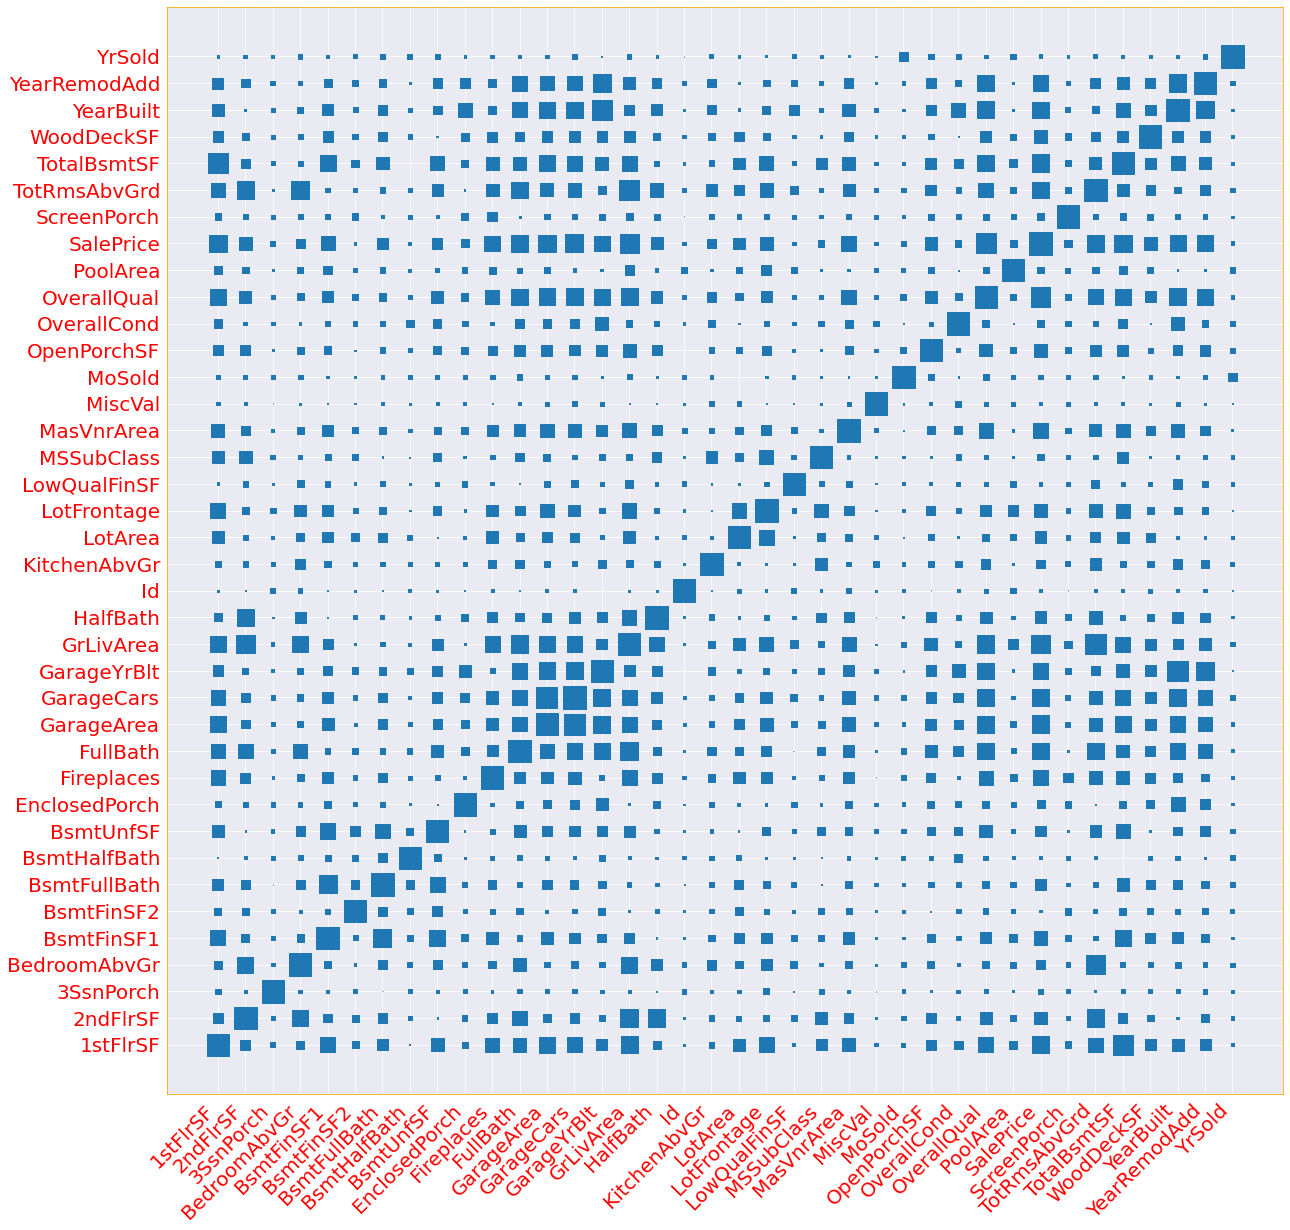

In [20]:
## ANALYSIS OF DATA ###

# Source (https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec)
def heatmap(x, y, size):
  with plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'red', 'figure.facecolor':'white'}):
  # Temporary rc parameters in effect
    fig, ax = plt.subplots(figsize=(20,20))
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    ax.tick_params(axis="x", labelsize=20)
    ax.tick_params(axis="y", labelsize=20)

corr = ds_train.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

In [0]:
# Create target column and independent variables list of columns
target = ['SalePrice']
train_columns = list(ds_train.columns.values)
train_columns.remove('SalePrice')

In [0]:
# Create power predictive score for train set
pps_train  = pps.matrix(ds_train)

In [0]:
pps_train

In [0]:
# Create power predictive score for train set
pps_test  = pps.matrix(ds_test)

In [0]:
pps_test

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'SalePrice distribution')

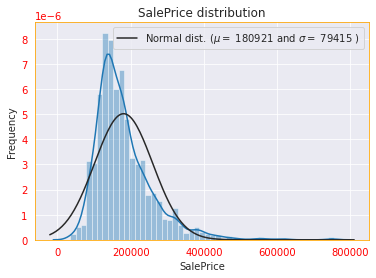

In [0]:
sns.distplot(ds_train['SalePrice'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(ds_train['SalePrice'])
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.0f} and $\sigma=$ {:.0f} )'.format(mu, sigma)],
           loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

In [0]:
analyser = DataAnalysis(ds_train, ds_test)

In [14]:
train_columns[2]

'MSZoning'

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 56.8973 |       42.2861        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


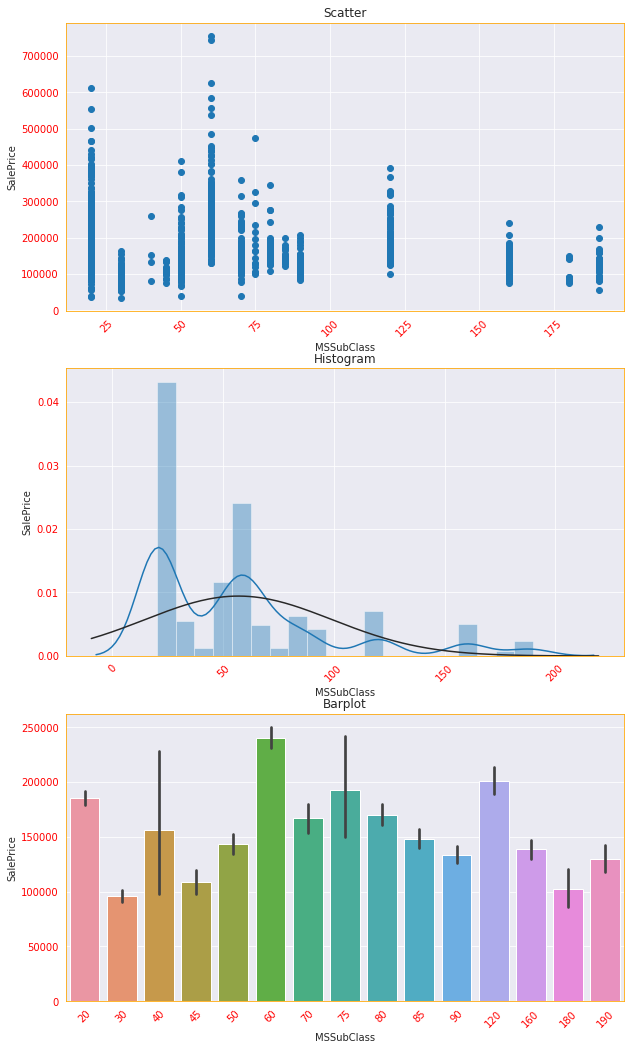

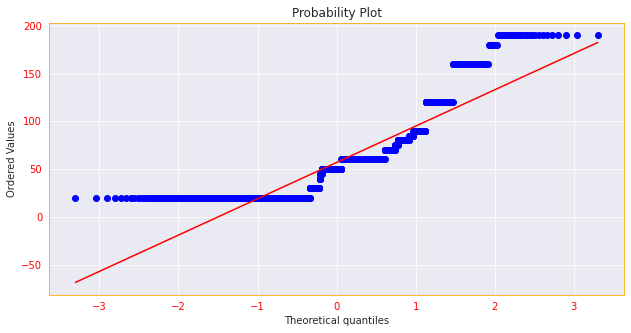

In [76]:
analyser.var_overview(var='MSSubClass', target='SalePrice')

Text(0.5, 0.98, 'Quality variables correlation with price')

Text(0.5, 1.0, 'ExterQual')

Text(0.5, 1.0, 'BsmtQual')

Text(0.5, 1.0, 'KitchenQual')

Text(0.5, 1.0, 'FireplaceQu')

Text(0.5, 1.0, 'GarageQual')

Text(0.5, 1.0, 'HeatingQC')

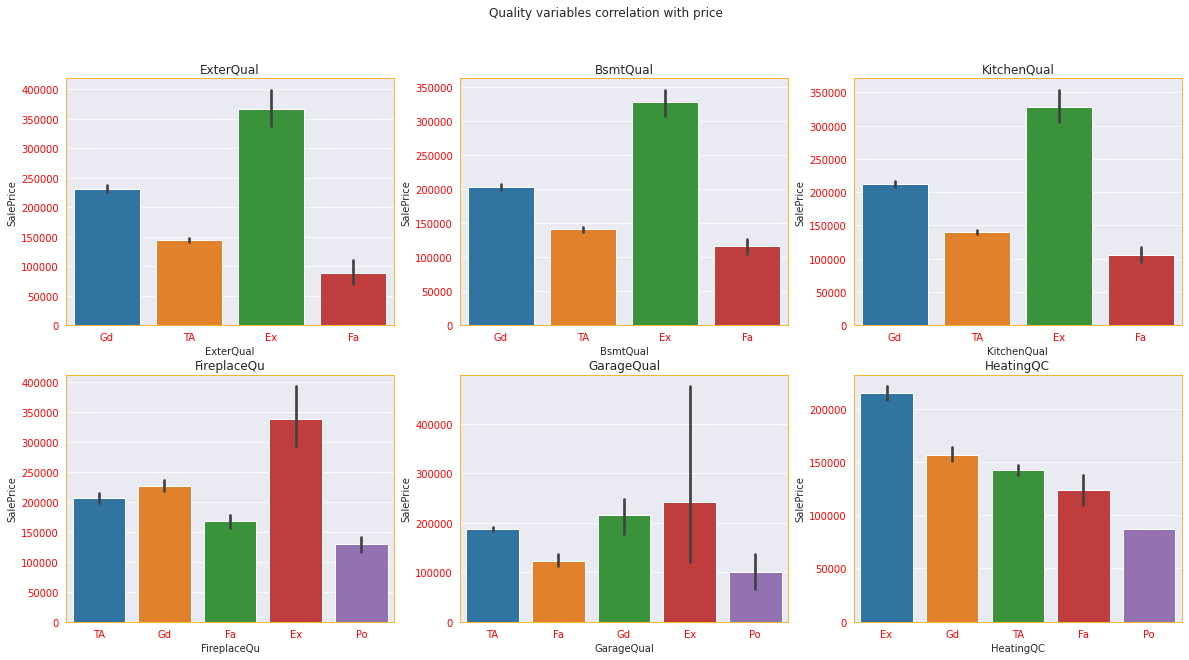

In [0]:
# Quality variables correleation with price (exept overall quality )
fig, axs = plt.subplots(2,3, figsize = (20,10))
fig.suptitle('Quality variables correlation with price')
sns.barplot(x='ExterQual', y='SalePrice', data=ds_train, ax=axs[0,0])
axs[0,0].set_title('ExterQual')
sns.barplot(x='BsmtQual', y='SalePrice', data=ds_train, ax=axs[0,1])
axs[0,1].set_title('BsmtQual')
sns.barplot(x='KitchenQual', y='SalePrice', data=ds_train, ax=axs[0,2])
axs[0,2].set_title('KitchenQual')
sns.barplot(x='FireplaceQu', y='SalePrice', data=ds_train, ax=axs[1,0])
axs[1,0].set_title('FireplaceQu')
sns.barplot(x='GarageQual', y='SalePrice', data=ds_train, ax=axs[1,1])
axs[1,1].set_title('GarageQual')
sns.barplot(x='HeatingQC', y='SalePrice', data=ds_train, ax=axs[1,2])
axs[1,2].set_title('HeatingQC')

Text(0.5, 0.98, 'Quality variables correlation with price')

Text(0.5, 1.0, 'YearBuilt')

Text(0.5, 1.0, 'YearRemodAdd')

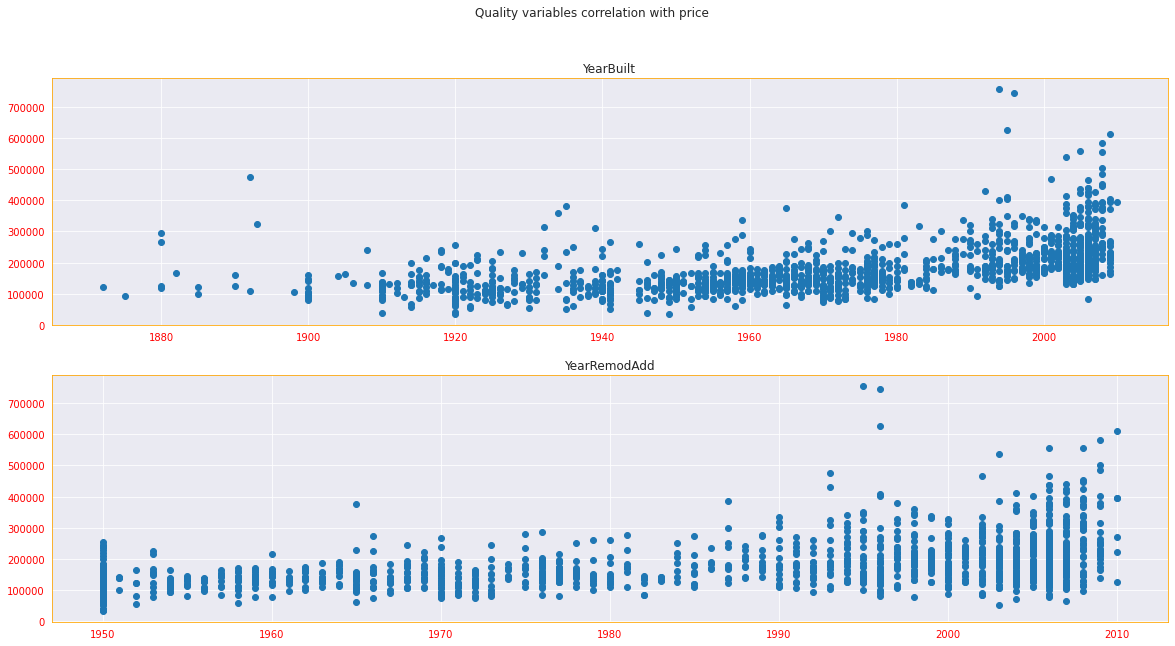

In [0]:
# Age correlation with price
fig, axs = plt.subplots(2, figsize = (20,10))
fig.suptitle('Quality variables correlation with price')
axs[0].scatter(ds_train['YearBuilt'], ds_train['SalePrice'])
axs[0].set_title('YearBuilt')
axs[1].scatter(ds_train['YearRemodAdd'], ds_train['SalePrice'])
axs[1].set_title('YearRemodAdd')

<Figure size 1440x720 with 0 Axes>

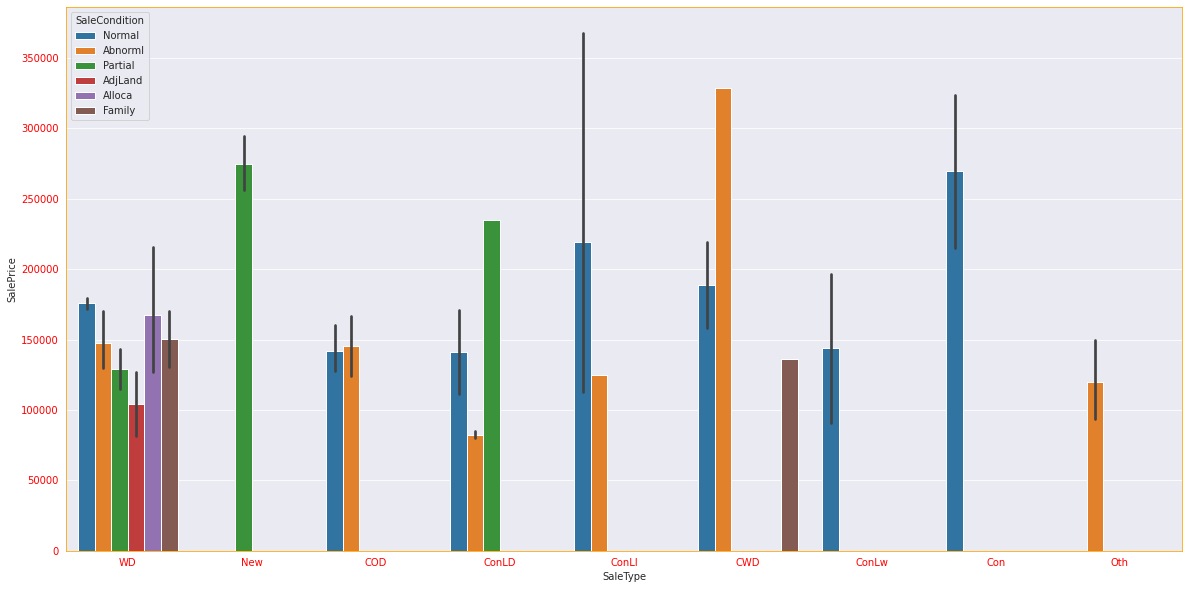

In [0]:
# Sale paramters correlation with price
plt.figure(figsize=(20, 10))
sns.barplot(x = 'SaleType', y = 'SalePrice', hue = 'SaleCondition', data=ds_train) 

# PREPROCESSING
### - Drop unwanted variables
### - Clean variables with nan values 
### - Create dummies for categorical variables

## DROP

In [0]:
# Create class object
preproc = DataProcessing(ds_train,ds_test)

In [0]:
# Create list of unwanted variables
preproc.drop_vars_list(freq = 0.9, null_factor = 0.6)

drop_list CREATED: 


(None,
 ['Street',
  'Utilities',
  'LandSlope',
  'Condition2',
  'RoofMatl',
  'Heating',
  'CentralAir',
  'Electrical',
  'LowQualFinSF',
  'BsmtHalfBath',
  'KitchenAbvGr',
  'Functional',
  'GarageCond',
  'PavedDrive',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'Alley',
  'PoolQC',
  'Fence',
  'MiscFeature'])

In [0]:
# Delete unwanted variables from train and test sets
preproc.drop()

Columns removed


## CLEANING

In [0]:
# Create list of variables with nan values
preproc.cleaning_vars_list()

cleaning_list CREATED: 


(None,
 ['LotFrontage',
  'MasVnrType',
  'MasVnrArea',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'FireplaceQu',
  'GarageType',
  'GarageYrBlt',
  'GarageFinish',
  'GarageQual',
  'MSZoning',
  'Exterior1st',
  'Exterior2nd',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  'BsmtFullBath',
  'KitchenQual',
  'GarageCars',
  'GarageArea',
  'SaleType'])

In [0]:
### CLEANING ###

In [0]:
# Clean LotFrontage for Train and Test dataset
# Filling missing values with most correlated variable coeffiecient calculation
preproc.fill_with_estimate_value(cleaned_column = 'LotFrontage', coeff_column = 'LotArea')

Train before:  259
Test before:  227
Train after:  0
Test after:  0


In [0]:
# Clean MasVnrType for Train and Test dataset
# Filling missing values with most common value
preproc.fill_with_most_common_value(column= 'MasVnrType')

Train before:  8
Test before:  16
Train after:  0
Test after:  0


In [0]:
# Clean MasVnrArea for Train and Test dataset
# Filling missing values with median
preproc.fill_with_median(column='MasVnrArea', dependent_column='MasVnrType', excluded_values=['None'])

Train before:  8
Test before:  15
Train after:  0
Test after:  0


In [0]:
# Clean BsmtQual for Train and Test dataset
# Filling missing values with selected strings
preproc.fill_with_strings(column='BsmtQual',
                          dependent_column='Foundation',
                          condition_list=['PConc'],
                          value_list=['Gd'],
                          last_value = 'TA')

Train before:  37
Test before:  44
Train after:  0
Test after:  0


In [0]:
# Clean BsmtCond for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with(column='BsmtCond', value='TA')

Train before:  37
Test before:  45
Train after:  0
Test after:  0


In [0]:
# Clean BsmtCond for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with(column='BsmtExposure', value='No')

Train before:  38
Test before:  44
Train after:  0
Test after:  0


In [0]:
# Clean BsmtFinType1 for Train and Test dataset
# Filling missing values with selected strings
preproc.fill_with_strings(column='BsmtFinType1',
                          dependent_column='Foundation',
                          condition_list=['PConc'],
                          value_list=['GLQ'],
                          last_value = 'Unf')

Train before:  37
Test before:  42
Train after:  0
Test after:  0


In [0]:
# Clean BsmtFinType2 for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with(column='BsmtFinType2', value='Unf')

Train before:  38
Test before:  42
Train after:  0
Test after:  0


In [0]:
# Clean FireplaceQu for Train and Test dataset
# Filling missing values with none
preproc.fill_with(column='FireplaceQu', value='none')

Train before:  690
Test before:  730
Train after:  0
Test after:  0


In [0]:
# Clean GarageType for Train and Test dataset
# Filling missing values with none
preproc.fill_with(column='GarageType', value='none')

Train before:  81
Test before:  76
Train after:  0
Test after:  0


In [0]:
# Clean GarageYrBlt for Train and Test dataset
# Filling missing values with 0
preproc.fill_with(column='GarageYrBlt', value=0)

Train before:  81
Test before:  78
Train after:  0
Test after:  0


In [0]:
# Clean GarageFinish for Train and Test dataset
# Filling missing values with none
preproc.fill_with(column='GarageFinish', value='none')

Train before:  81
Test before:  78
Train after:  0
Test after:  0


In [0]:
# Clean GarageQual for Train and Test dataset
# Filling missing values with none
preproc.fill_with(column='GarageQual', value='none')

Train before:  81
Test before:  78
Train after:  0
Test after:  0


In [0]:
# Clean Exterior1st for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with(column='Exterior1st', value='VinylSd')

Train before:  0
Test before:  1
Train after:  0
Test after:  0


In [0]:
# Clean Exterior2nd for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with(column='Exterior2nd', value='VinylSd')

Train before:  0
Test before:  1
Train after:  0
Test after:  0


In [0]:
# Clean BsmtFinSF1 for Train and Test dataset
# Filling missing values with 0
preproc.fill_with(column='BsmtFinSF1', value=0)

Train before:  0
Test before:  1
Train after:  0
Test after:  0


In [0]:
# Clean BsmtFinSF2 for Train and Test dataset
# Filling missing values with 0
preproc.fill_with(column='BsmtFinSF2', value=0)

Train before:  0
Test before:  1
Train after:  0
Test after:  0


In [0]:
# Clean BsmtUnfSF for Train and Test dataset
# Filling missing values with 0
preproc.fill_with(column='BsmtUnfSF', value=0)

Train before:  0
Test before:  1
Train after:  0
Test after:  0


In [0]:
# Clean TotalBsmtSF for Train and Test dataset
# Filling missing values with 0
preproc.fill_with(column='TotalBsmtSF', value=0)

Train before:  0
Test before:  1
Train after:  0
Test after:  0


In [0]:
# Clean BsmtFullBath for Train and Test dataset
# Filling missing values with 0
preproc.fill_with(column='BsmtFullBath', value=0)

Train before:  0
Test before:  2
Train after:  0
Test after:  0


In [0]:
# Clean KitchenQual for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with(column='KitchenQual', value='TA')

Train before:  0
Test before:  1
Train after:  0
Test after:  0


In [0]:
# Clean GarageCars for Train and Test dataset
# Filling missing values with most common value
preproc.fill_with(column='GarageCars', value=2)

Train before:  0
Test before:  1
Train after:  0
Test after:  0


In [0]:
# Clean GarageArea for test dataset  
# Checking number of nan values         
print(ds_train['GarageArea'].isnull().sum())
print(ds_test['GarageArea'].isnull().sum())
# Check correlation between GarageCars and GarageArea
#sns.barplot(x = 'GarageCars', y = 'GarageArea', data=ds_train) 
# Mediana of GarageArea for GarageCars = 2
ds_test['GarageArea'].fillna('null', inplace = True)
g_area_for_2_list = []
for i in range(0, len(ds_test)): 
    if ds_test['GarageCars'][i] == 2:      
        if not ds_test['GarageArea'][i] == 'null':
            g_area_for_2_list.append(ds_test['GarageArea'][i])
    else:
        continue
g_area_for_2 = sum(g_area_for_2_list)/float(len(g_area_for_2_list))
# filling missing values with most common one
ds_test['GarageArea'].fillna(g_area_for_2, inplace = True)


0
1


In [0]:
# Clean SaleType for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with(column='SaleType', value='WD')

Train before:  0
Test before:  1
Train after:  0
Test after:  0


## CREATE DUMMIES

In [0]:
# Final values check 
print (ds_train.info())
print (ds_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  Exterior1st    1460 non-null   object 
 18  Exterior

In [0]:
# Create additional datasets
dummy_list_str = [] # Dummy list for string columns
dummy_list_num = [] # Dummy list for numerical columns

In [0]:
### CREATING DUMMY VARIABLES ### 
# list of string type categorical independent variables
for dataset in ds:
    for column in dataset.columns: 
        if type(dataset[column][0]) == type('a'):
            dummy_list_str.append(column)
    else:
        continue

In [0]:
# list of numerical type categorical independent variables
dummy_list_num.append('MSSubClass')
# merge lists
dummy_list = dummy_list_str + dummy_list_num
# Change MSSubClass type to string
ds_train['MSSubClass'] = ds_train['MSSubClass'].astype(str)
ds_test['MSSubClass'] = ds_train['MSSubClass'].astype(str)
# Create dummy variables
ds_dummy_train = pd.get_dummies(ds_train[dummy_list], drop_first=True)
ds_dummy_test = pd.get_dummies(ds_test[dummy_list], drop_first=True)


In [0]:
print(ds_train['MSSubClass'].value_counts())
print(ds_test['MSSubClass'].value_counts())
# drop transformed columns
ds_train.drop(dummy_list, axis=1, inplace = True)
ds_test.drop(dummy_list, axis=1, inplace = True) 
# add dummy columns to datasets
ds_train = pd.concat([ds_train, ds_dummy_train], axis=1, sort=False)
ds_test = pd.concat([ds_test, ds_dummy_test], axis=1, sort=False)


20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
20     535
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


# CREATING MODEL

In [0]:
#### MODEL DATA ######
#Machine Learning Algorithm (MLA) Selection and Initialization

# split data to train and test sets

X_train, X_test, y_train, y_test = model_selection.train_test_split(ds_train[train_columns], ds_train[target], random_state = 0)